# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.
توفر مجموعة بيانات RTA لقطة مفصلة لحوادث حركة المرور على الطرق ، حيث تلتقط مجموعة من البيانات من ظروف الحوادث إلى تفاصيل الضحايا.تعد مجموعة البيانات هذه ضرورية لتحليل الأنماط وأسباب الحوادث لتحسين سلامة الطرق.
### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
file_path = 'RTA_Dataset.csv'
df = pd.read_csv(file_path)


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
print(df.head(10))

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr      

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
print(df.describe())


       Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000


In [7]:
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [8]:
df.dropna(inplace=True)


In [9]:
df.drop_duplicates()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [10]:
df.tail(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12297,12:30:00,Thursday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12298,18:45:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
12299,18:45:00,Wednesday,31-50,Male,Elementary school,Employee,2-5yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
12300,19:12:00,Tuesday,31-50,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
12301,17:25:00,Friday,31-50,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,1-2yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
12302,17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [11]:
df.shape

(2889, 32)

In [12]:
print('total missing values:', df.isna().sum().sum())

total missing values: 0


In [13]:
# انظر إلى الصفوف حيث لدينا خلايا فارغه`
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
8   17:20:00      Friday              18-30          Male  Junior high school   
9   17:20:00      Friday              18-30          Male  Junior high school   
12  17:45:00    Thursday              18-30          Male  Junior high school   
13  17:45:00    Thursday              31-50          Male  Junior high school   
14  17:45:00    Thursday              31-50          Male  Junior high school   

   Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
8                 Employee         Above 10yr      Lorry (41?100Q)   
9                 Employee              1-2yr           Automobile   
12                Employee              1-2yr  Public (> 45 seats)   
13                Employee             5-10yr      Lorry (41?100Q)   
14                Employee         Above 10yr           Automobile   

   Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
8             Owner    

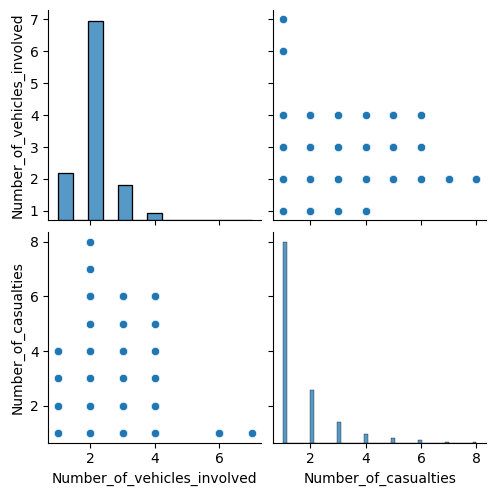

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# فهم البيانات
print(df.head())
print(df.info())

# التحليل الإحصائي الوصفي
print(df.describe())

# استكشاف القيم المفقودة
print(df.isnull().sum())

# التحليل البصري
sns.pairplot(df)
plt.show()

In [15]:
# تجهيز البيانات
X = data.drop('target_column', axis=1)
y = data['target_column']


NameError: name 'data' is not defined

In [ ]:
# We need to reset our index after all the dropping
df.reset_index(inplace=True, drop=True)

<Axes: >

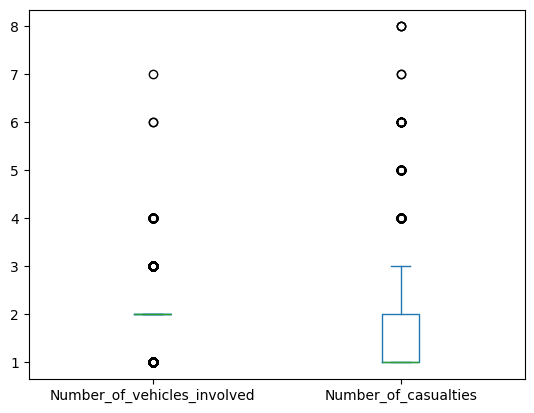

In [ ]:
df.plot.box()

array([[<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_vehicles_involved'>,
        <Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>],
       [<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>,
        <Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>]],
      dtype=object)

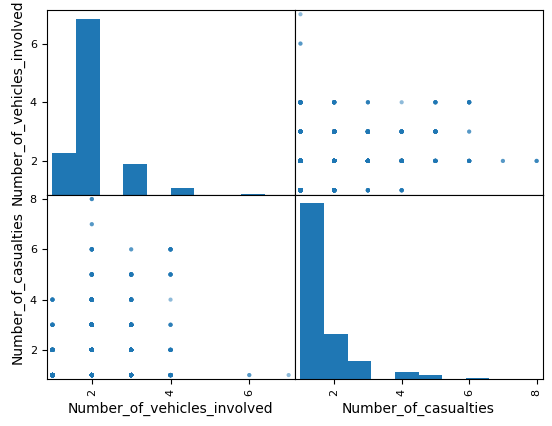

In [ ]:
pd.plotting.scatter_matrix(df)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
X = df[['Number_of_vehicles_involved']].values 
y = df[['Number_of_casualties']]




In [65]:
numeric_features = ["Age", "Years of Experience"]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())]
)

categorical_features = ["Gender", "Education Level", "Job Title"]
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mode')),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

NameError: name 'OneHotEncoder' is not defined

In [64]:
# استخدام LabelEncoder لترميز الأعمدة الفئوية
categorical_features = ['Time', 'Age_band_of_driver','Age_band_of_casualty','Casualty_severity','Driving_experience','Service_year_of_vehicle']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

NameError: name 'LabelEncoder' is not defined

In [17]:
df.shape

(2889, 32)

In [61]:
X = df.drop('target_column', axis=1)
y = df['target_column']

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 15 positional arguments (and 1 keyword-only argument) were given

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              2889 non

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.§
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [ ]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
5685,18:28:00,Tuesday,18-30,Male,Elementary school,Employee,Below 1yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Driving at high speed,Slight Injury
10318,18:30:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Public (13?45 seats),Owner,5-10yrs,...,Entering a junction,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9122,17:22:00,Saturday,Over 51,Male,Above high school,Employee,2-5yr,Taxi,Owner,5-10yrs,...,Going straight,Pedestrian,Female,31-50,2,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Serious Injury
600,12:48:00,Sunday,31-50,Male,Illiterate,Owner,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Pedestrian,Female,Under 18,3,Driver,Normal,"In carriageway, statioNot a Pedestrianry - not...",No distancing,Slight Injury
7049,8:30:00,Wednesday,18-30,Male,Elementary school,Employee,Below 1yr,Public (13?45 seats),Owner,Unknown,...,Getting off,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [ ]:
df.plot.hist(by='col1',bins='bin-count' )

KeyError: 'col1'

In [ ]:
df. plot.pie(y='Day_of_week')

TypeError: '<' not supported between instances of 'str' and 'int'

<Axes: >

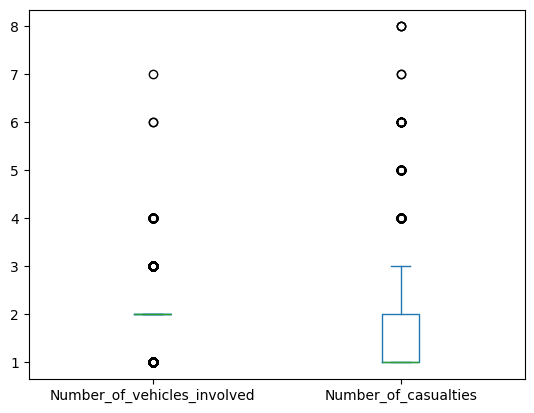

In [ ]:
df.plot.box()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


AttributeError: 'DataFrame' object has no attribute 'predict'

In [47]:

# plot the difference between the actual and predicted values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



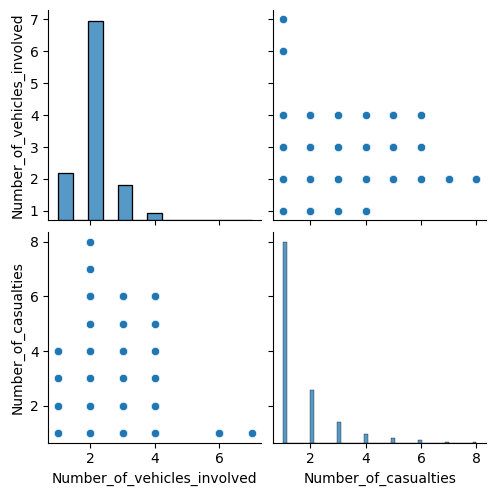

In [49]:
# التحليل البصري
sns.pairplot(df)
plt.show()

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Decision Tree Classifier

In [71]:
from sklearn.preprocessing import StandardScaler
# Define features
numerical_features = ['Number_of_vehicles_involved', 'Number_of_casualties']
categorical_features = ['Sex_of_driver', 'Educational_level']

# Define the numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers into a preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


NameError: name 'OneHotEncoder' is not defined

#### Support Vector Machine (SVM)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              2889 non

#### K-Neighbors Classifier

In [84]:

#تحديد شبكة المعلمة للبحث عن الشبكة

param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}

In [92]:
X = df.drop(columns=['Number_of_vehicles_involved'])
y = df['Number_of_vehicles_involved']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحديد الميزات العددية والفئوية
numerical_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

# إنشاء محول للمعالجة المسبقة
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)



NameError: name 'ColumnTransformer' is not defined

In [100]:
# Define the model
clf = RandomForestClassifier(random_state=0)

In [95]:
from sklearn.pipeline import Pipeline
# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('df', df),
                           ('model', clf)])

In [101]:
# Make predictions
predictions = pipeline.predict(X_test)
print(predictions)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [97]:
# Fit the model
pipeline.fit(X_train, y_train)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [102]:
# Make predictions
predictions = pipeline.predict(X_test)
print(predictions)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [103]:
# تجميع البيانات وحساب المتوسط
df_grouped = df.groupby('column_to_group_by').mean()

SyntaxError: invalid syntax (2636076183.py, line 1)

In [104]:
pipeline.score(X_test, y_test)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- ** ميزة أهمية **: تحديد ومناقشة أهم الميزات لنموذج أفضل الأداء.كيف تؤثر هذه الميزات على التنبؤات؟استخدم التصورات التي أنشأتها لتبرير إجابتك إذا لزم الأمر.
- ** قيود النماذج **: ناقش أي قيود واجهتها مع النماذج التي استخدمتها.هل هناك أي جوانب من البيانات أو المشكلة التي لا تتعامل معها هذه النماذج بشكل جيد؟
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Copy code
# تجميع البيانات وحساب المتوسط
df_grouped = df.groupby('column_to_group_by').mean()